In [2]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode,skew,skewtest

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cross_validation import StratifiedKFold,train_test_split
from sklearn import linear_model
import xgboost as xgb

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Data Science/Datasets/MiniHack/train.csv')
test=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Data Science/Datasets/MiniHack/test.csv')

In [5]:
train.head(5)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [6]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [7]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [8]:
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [9]:
train['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [10]:
train.drop('Trip_ID',1,inplace=True)

trip_ids=test['Trip_ID']
test.drop('Trip_ID',1,inplace=True)

In [11]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,NaN,NaN,2.152500,0.000000,NaN,48.000000,67.000000,2.000000
50%,38.200000,NaN,NaN,2.895000,0.000000,NaN,50.000000,74.000000,2.000000
75%,60.730000,NaN,NaN,3.582500,1.000000,NaN,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


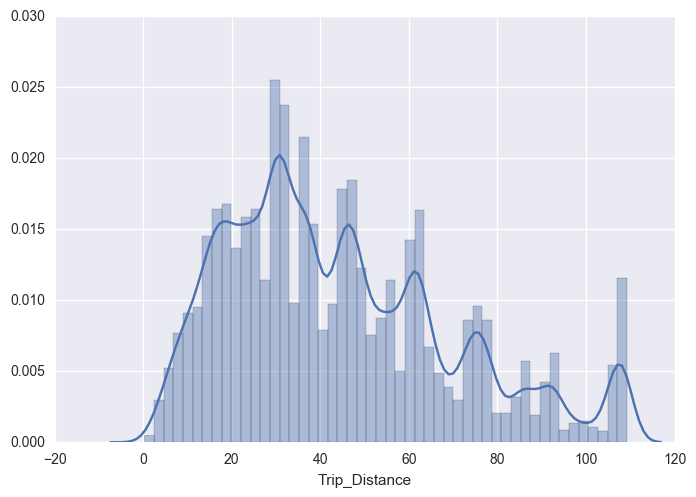

In [12]:
sns.distplot(train['Trip_Distance'])

In [13]:
train=train.fillna(value={'Type_of_Cab':train['Type_of_Cab'].mode()[0],
                          'Confidence_Life_Style_Index':train['Confidence_Life_Style_Index'].mode()[0]})
test=test.fillna(value={'Type_of_Cab':test['Type_of_Cab'].mode()[0],
                          'Confidence_Life_Style_Index':test['Confidence_Life_Style_Index'].mode()[0]})

In [14]:
train.isnull().sum()

Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [15]:
train['Customer_Since_Months'].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

In [16]:
train['Var1'].median()

61.0

In [17]:
train=train.fillna(value={'Customer_Since_Months':train['Customer_Since_Months'].mode()[0],
                          'Life_Style_Index':train['Life_Style_Index'].mean(),'Var1':train['Var1'].median()})
test=test.fillna(value={'Customer_Since_Months':test['Customer_Since_Months'].mode()[0],
                          'Life_Style_Index':test['Life_Style_Index'].mean(),'Var1':test['Var1'].median()})

In [18]:
train.isnull().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [19]:
test.isnull().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
dtype: int64

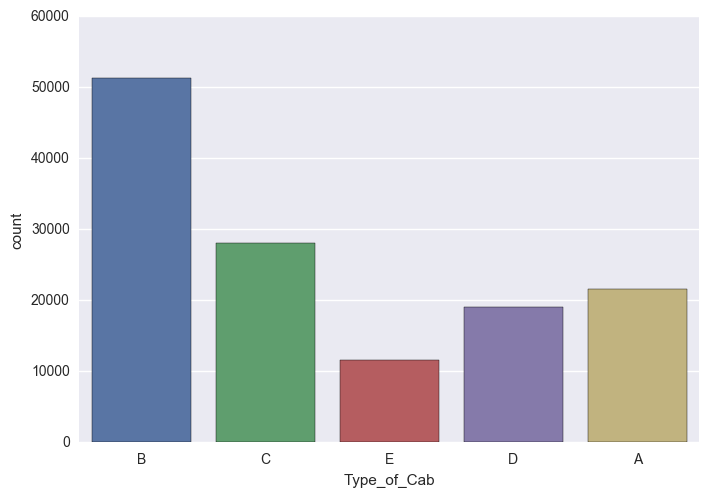

In [20]:
sns.countplot(train['Type_of_Cab'])

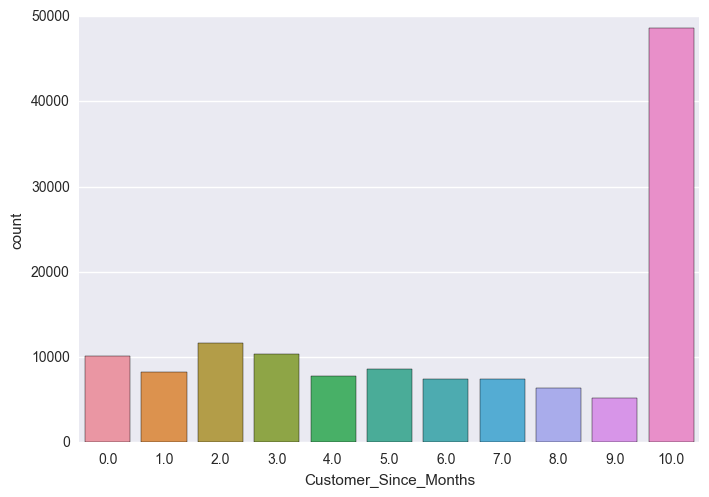

In [21]:
sns.countplot(train['Customer_Since_Months'])

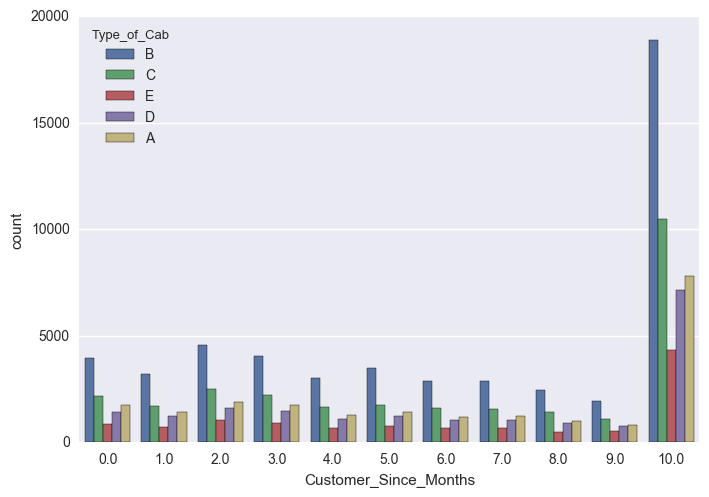

In [22]:
sns.countplot(train['Customer_Since_Months'],hue=train['Type_of_Cab'])

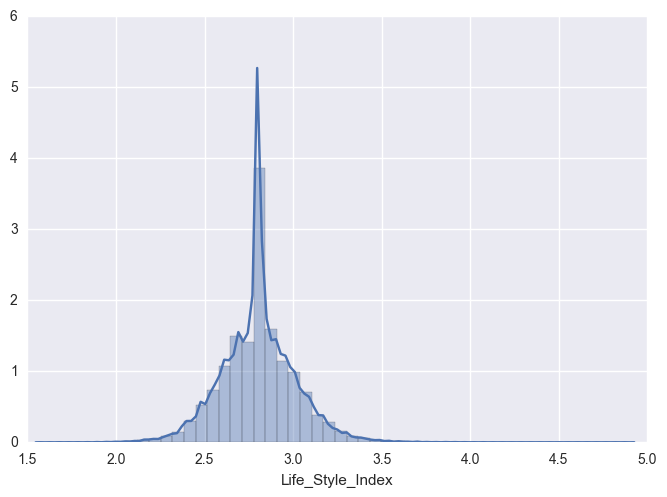

In [23]:
sns.distplot((train['Life_Style_Index']))

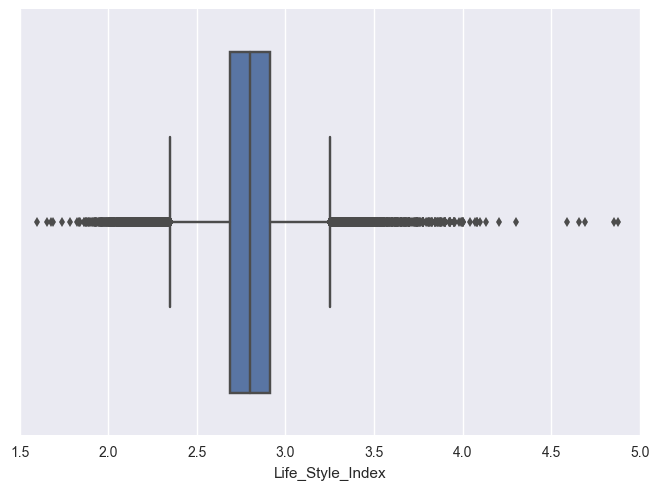

In [24]:
sns.boxplot(train['Life_Style_Index'])

In [25]:
train['Life_Style_Index'][train['Life_Style_Index']>4.5]=train['Life_Style_Index'].mean()

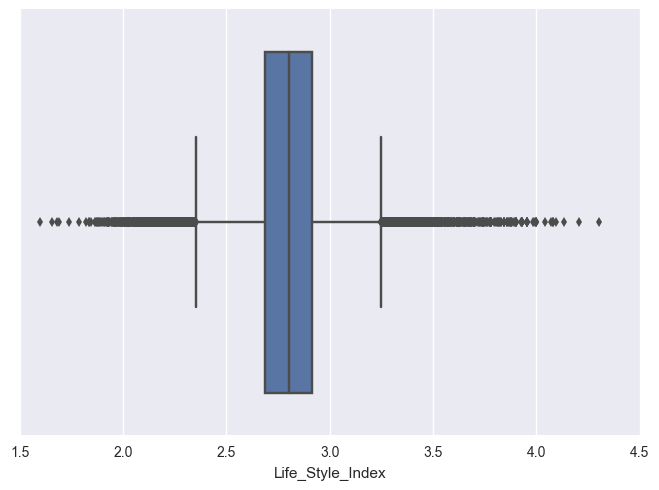

In [26]:
sns.boxplot(train['Life_Style_Index'])

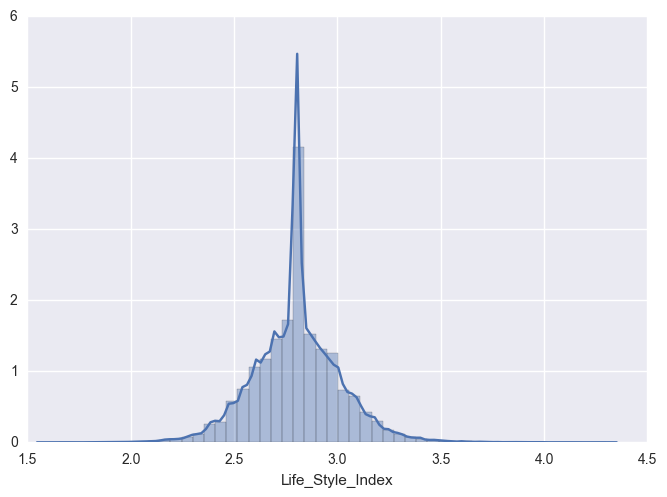

In [27]:
sns.distplot((train['Life_Style_Index']))

In [28]:
train['Confidence_Life_Style_Index'].value_counts()

B    60548
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

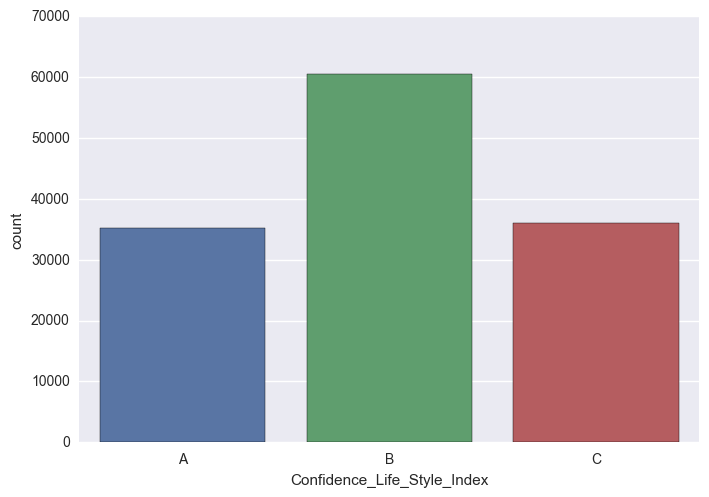

In [29]:
sns.countplot(train['Confidence_Life_Style_Index'])

In [30]:
forest=RandomForestClassifier(n_estimators=100,n_jobs=-1)
forest.fit(train.drop('Surge_Pricing_Type',1).select_dtypes(include = ['float64', 'int64']),train['Surge_Pricing_Type'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

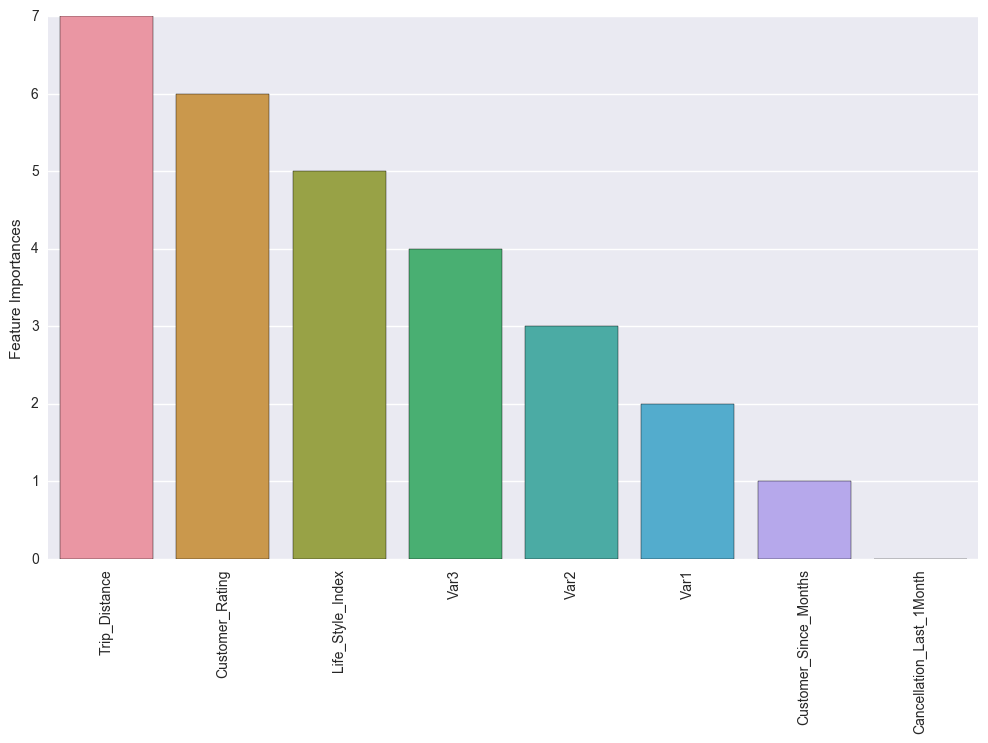

In [33]:
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
features=train.drop('Surge_Pricing_Type',1).select_dtypes(include = ['float64', 'int64']).columns
plt.figure(figsize = (12,7))
ax=sns.barplot(x=importances[indices],y=range(len(indices)))
ax = plt.xticks(range(len(indices)),features[indices],rotation=90)
plt.ylabel('Feature Importances')

In [698]:
train['Destination_Type'].value_counts()

A    77597
B    29555
C     7484
D     6588
E     2717
F     1950
G     1489
H     1260
I      813
J      695
K      680
L      643
N       98
M       93
Name: Destination_Type, dtype: int64

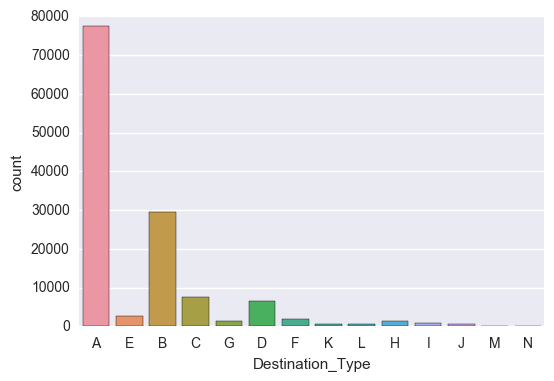

In [699]:
sns.countplot(train['Destination_Type'])

In [700]:
dict_=dict(train['Destination_Type'].value_counts())
total_dest=train['Destination_Type'].value_counts().sum()

for dest in dict_:
    if float(dict_[dest])/float(total_dest)<0.05:
        train['Destination_Type'][train['Destination_Type']==dest]='Other'

In [701]:
dict_=dict(test['Destination_Type'].value_counts())
total_dest=test['Destination_Type'].value_counts().sum()

for dest in dict_:
    if float(dict_[dest])/float(total_dest)<0.05:
        test['Destination_Type'][test['Destination_Type']==dest]='Other'

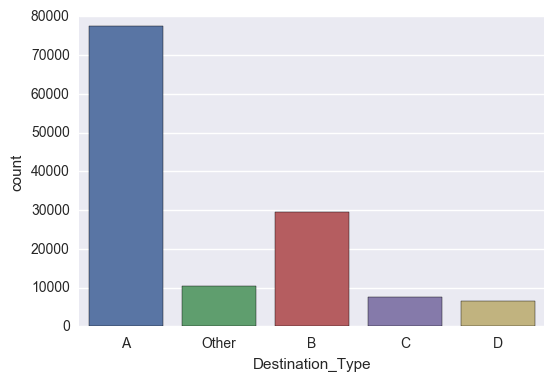

In [702]:
sns.countplot(train['Destination_Type'])

In [703]:
train['Customer_Rating'].value_counts()

2.75000    122
3.50000    120
3.35000    116
2.60000    112
3.20000    109
3.05000    102
2.30000     99
2.67500     97
3.65000     96
2.45000     96
2.97500     90
2.90000     90
2.00000     89
5.00000     87
3.11000     87
3.56000     87
2.96000     86
3.44000     86
2.70500     85
2.90375     85
3.28625     85
2.15000     84
3.16500     83
3.02000     83
2.93375     83
2.65000     81
2.54000     80
2.80500     80
3.04625     80
2.75500     80
          ... 
0.45500      1
0.45000      1
0.11375      1
0.44750      1
0.00625      1
0.39500      1
0.44250      1
4.99500      1
0.60500      1
0.18000      1
0.16625      1
0.05125      1
0.31750      1
0.35000      1
0.30250      1
0.52625      1
0.14500      1
0.22625      1
0.18125      1
0.13875      1
0.01875      1
0.60875      1
0.59500      1
0.51375      1
4.94875      1
0.07125      1
0.31250      1
0.00875      1
4.94125      1
0.27500      1
Name: Customer_Rating, dtype: int64

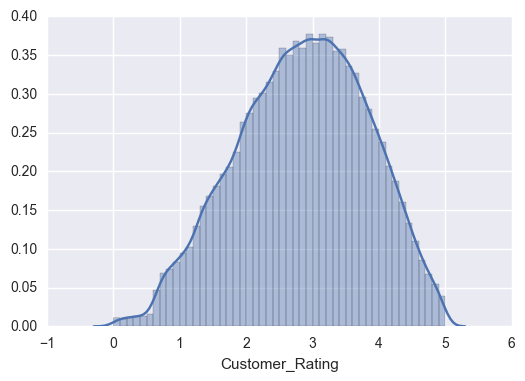

In [704]:
sns.distplot((train['Customer_Rating']))

In [705]:
train['Cancellation_Last_1Month'].value_counts()

0    68687
1    36834
2    16223
3     7142
4     1823
5      668
6      266
7       16
8        3
Name: Cancellation_Last_1Month, dtype: int64

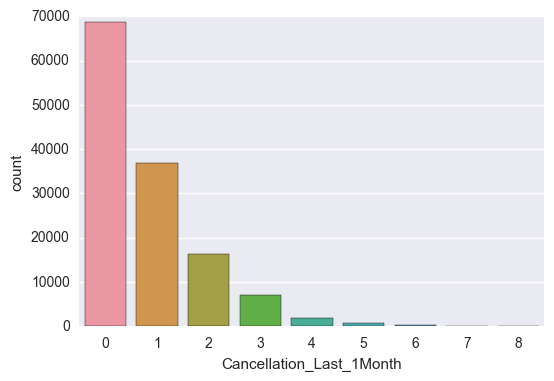

In [706]:
sns.countplot(train['Cancellation_Last_1Month'])

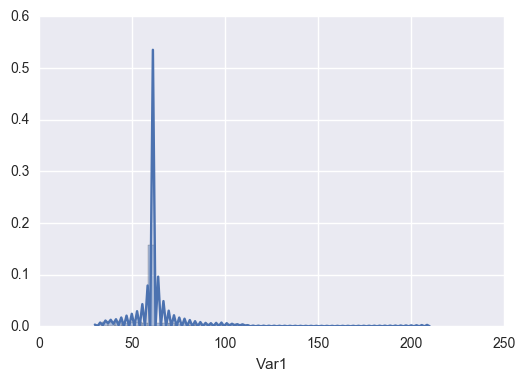

In [707]:
sns.distplot(train['Var1'])

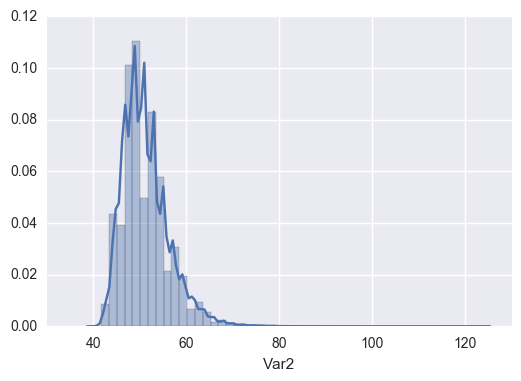

In [708]:
sns.distplot(train['Var2'])

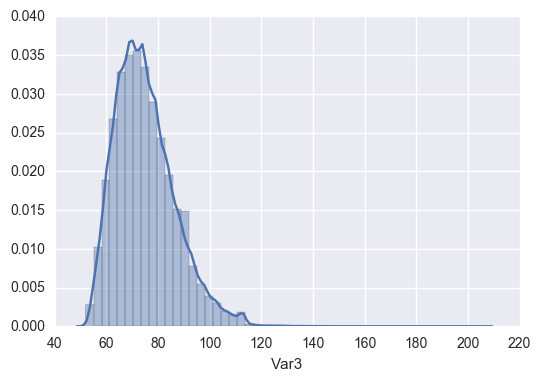

In [709]:
sns.distplot((train['Var3']))

In [710]:
train['Var1'].value_counts()

61.0     71908
39.0      1259
42.0      1221
38.0      1208
43.0      1190
37.0      1180
40.0      1163
48.0      1123
36.0      1123
45.0      1107
44.0      1087
50.0      1084
46.0      1073
49.0      1064
41.0      1063
47.0      1016
52.0       985
51.0       981
57.0       967
54.0       963
59.0       957
58.0       956
56.0       944
55.0       936
63.0       936
53.0       935
60.0       891
66.0       878
35.0       874
72.0       865
         ...  
129.0        2
165.0        2
117.0        2
159.0        1
160.0        1
161.0        1
154.0        1
156.0        1
200.0        1
163.0        1
169.0        1
148.0        1
171.0        1
173.0        1
179.0        1
149.0        1
135.0        1
146.0        1
144.0        1
141.0        1
139.0        1
136.0        1
133.0        1
132.0        1
131.0        1
128.0        1
122.0        1
120.0        1
119.0        1
210.0        1
Name: Var1, dtype: int64

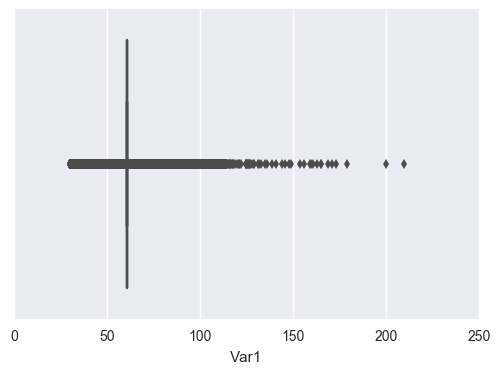

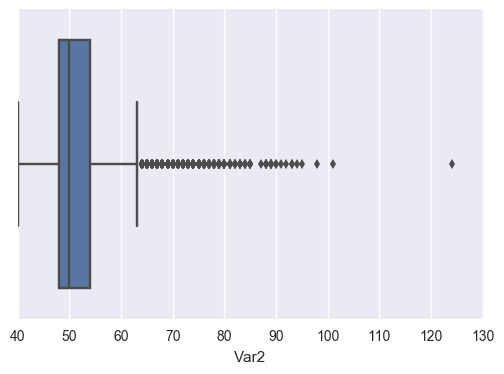

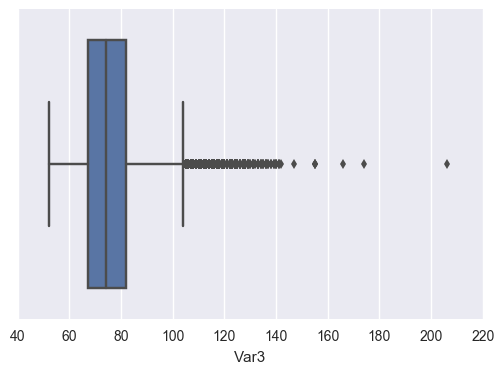

In [711]:
plt.figure(1)
sns.boxplot(train['Var1'])

plt.figure(2)
sns.boxplot(train['Var2'])

plt.figure(3)
sns.boxplot(train['Var3'])



In [712]:
train['Var1'][train['Var1']>=200]=train['Var1'].median()
train['Var2'][train['Var2']>=100]=train['Var2'].median()
train['Var3'][train['Var3']>=160]=train['Var3'].median()

In [713]:
train['Var1*Var2']=train['Var1']*train['Var2']
train['Var2*Var3']=train['Var2']*train['Var3']
train['Var3*Var1']=train['Var3']*train['Var1']

train['Var1**2']=train['Var1']**2
train['Var2**2']=train['Var2']**2
train['Var3**2']=train['Var3']**2


In [714]:
test['Var1*Var2']=test['Var1']*test['Var2']
test['Var2*Var3']=test['Var2']*test['Var3']
test['Var3*Var1']=test['Var3']*test['Var1']

test['Var1**2']=test['Var1']**2
test['Var2**2']=test['Var2']**2
test['Var3**2']=test['Var3']**2

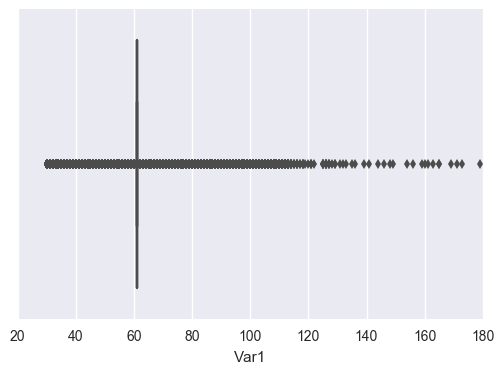

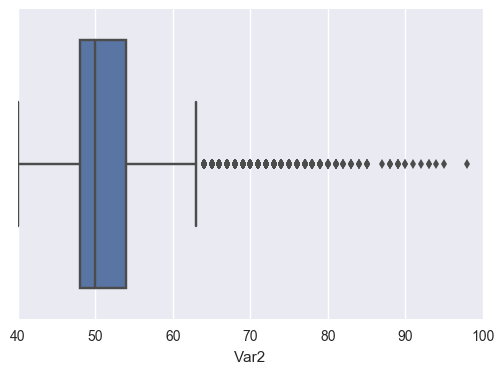

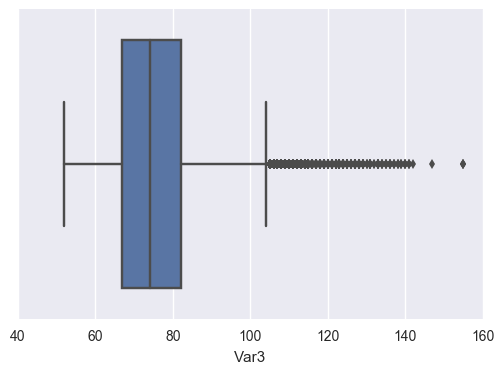

In [715]:
plt.figure(1)
sns.boxplot(train['Var1'])

plt.figure(2)
sns.boxplot(train['Var2'])

plt.figure(3)
sns.boxplot(train['Var3'])

In [716]:
#train['Var1/Var2']=np.log(train['Var1']/train['Var2'])
#train['Var2/Var3']=train['Var2']/train['Var3']
#train['Var1/Var3']=train['Var1']/train['Var3']

In [717]:
#test['Var1/Var2']=np.log(test['Var1']/train['Var2'])
#test['Var2/Var3']=test['Var2']/train['Var3']
#test['Var1/Var3']=test['Var1']/train['Var3']

In [718]:
#sns.distplot(np.log(train['Var1/Var3']))

In [719]:
#sns.countplot(train['Gender'],hue=train['Surge_Pricing_Type'])

In [720]:
lb=LabelEncoder()
for obj in train.drop('Surge_Pricing_Type',1).select_dtypes(['object']).columns:
    x=lb.fit_transform(train[obj])
    train.drop(obj,1,inplace=True)
    train[obj]=x

In [721]:
lb=LabelEncoder()
for obj in test.select_dtypes(['object']).columns:
    x=lb.fit_transform(test[obj])
    test.drop(obj,1,inplace=True)
    test[obj]=x

In [722]:
train.head(5)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Var1*Var2,Var2*Var3,Var3*Var1,Var1**2,Var2**2,Var3**2,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,6.77,1.0,2.427690,3.90500,0,40.0,46,60,2,1840.0,2760,2400.0,1600.0,2116,3600,1,0,0,0
1,29.47,10.0,2.782450,3.45000,0,38.0,56,78,2,2128.0,4368,2964.0,1444.0,3136,6084,1,1,0,1
2,41.58,10.0,2.802064,3.50125,2,61.0,56,77,2,3416.0,4312,4697.0,3721.0,3136,5929,1,1,4,1
3,61.56,10.0,2.802064,3.45375,0,61.0,52,74,3,3172.0,3848,4514.0,3721.0,2704,5476,2,1,0,1
4,54.95,10.0,3.034530,3.40250,4,51.0,49,102,2,2499.0,4998,5202.0,2601.0,2401,10404,2,1,0,1


In [723]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Var1*Var2,Var2*Var3,Var3*Var1,Var1**2,Var2**2,Var3**2,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.195766,2.801991,2.849458,0.782838,62.472695,51.201850,75.096558,2.155747,3196.856732,3884.433284,4687.806960,4124.338139,2646.431818,5773.281334,1.603340,1.006228,0.805388,0.713190
std,25.522882,3.639259,0.207418,0.980675,1.037559,14.882949,4.980215,11.566735,0.738164,823.128763,930.584050,1349.998398,2119.157584,540.591421,1856.586093,1.177128,0.734909,1.233695,0.452274
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000,1260.000000,2120.000000,1560.000000,900.000000,1600.000000,2704.000000,0.000000,0.000000,0.000000,0.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,61.000000,48.000000,67.000000,2.000000,2806.000000,3220.000000,3843.000000,3721.000000,2304.000000,4489.000000,1.000000,0.000000,0.000000,0.000000
50%,38.200000,7.000000,2.802064,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000,3050.000000,3723.000000,4410.000000,3721.000000,2500.000000,5476.000000,1.000000,1.000000,0.000000,1.000000
75%,60.730000,10.000000,2.912750,3.582500,1.000000,61.000000,54.000000,82.000000,3.000000,3477.000000,4350.000000,5246.000000,3721.000000,2916.000000,6724.000000,2.000000,2.000000,1.000000,1.000000
max,109.230000,10.000000,4.300830,5.000000,8.000000,179.000000,98.000000,155.000000,3.000000,10065.000000,13328.000000,15810.000000,32041.000000,9604.000000,24025.000000,4.000000,2.000000,4.000000,1.000000


In [724]:
scaler=StandardScaler(with_mean=True,with_std=True)
labels=train['Surge_Pricing_Type']
train.drop('Surge_Pricing_Type',1,inplace=True)
scaled_features=scaler.fit_transform(train)
scaled_data=pd.DataFrame(scaled_features,index=train.index,columns=train.columns)

In [725]:
scaled_train=scaled_data
scaled_train['Surge_Pricing_Type']=labels

In [726]:
scaled_features2=scaler.fit_transform(test)
scaled_test=pd.DataFrame(scaled_features2,index=test.index,columns=test.columns)

In [727]:
scaled_train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Var1*Var2,Var2*Var3,Var3*Var1,Var1**2,Var2**2,Var3**2,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender,Surge_Pricing_Type
count,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,1.316620e+05,131662.000000
mean,1.046546e-16,-1.666800e-16,1.478687e-15,9.504991e-17,-1.691707e-16,1.275211e-15,2.427950e-16,-3.319555e-16,7.541239e-17,-1.608610e-16,1.185760e-16,-8.318873e-16,1.059143e-15,-2.047734e-16,-3.389557e-15,-1.026506e-15,4.235952e-16,2.368974e-16,2.155747
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.738164
min,-1.719676e+00,-1.702487e+00,-5.812499e+00,-2.904344e+00,-7.545023e-01,-2.181881e+00,-2.249279e+00,-1.996816e+00,-2.353051e+00,-1.896057e+00,-2.316906e+00,-1.521525e+00,-1.935724e+00,-1.653192e+00,-1.362083e+00,-1.369193e+00,-6.528284e-01,-1.576904e+00,1.000000
25%,-7.687605e-01,-8.781400e-01,-5.498015e-01,-7.106946e-01,-7.545023e-01,-9.895222e-02,-6.429165e-01,-6.999891e-01,-4.748446e-01,-7.139987e-01,-6.257861e-01,-1.903302e-01,-6.334416e-01,-6.917461e-01,-5.125549e-01,-1.369193e+00,-6.528284e-01,-1.576904e+00,2.000000
50%,-2.351197e-01,2.209891e-01,3.536895e-04,4.643965e-02,-7.545023e-01,-9.895222e-02,-2.413259e-01,-9.480308e-02,-1.784135e-01,-1.734759e-01,-2.057840e-01,-1.903302e-01,-2.708744e-01,-1.601232e-01,-5.125549e-01,-8.474648e-03,-6.528284e-01,6.341539e-01,2.000000
75%,6.476210e-01,1.045336e+00,5.339939e-01,7.474898e-01,2.093017e-01,-9.895222e-02,5.618553e-01,5.968381e-01,3.403408e-01,5.002971e-01,4.134784e-01,-1.903302e-01,4.986561e-01,5.120809e-01,3.369737e-01,1.352244e+00,1.577478e-01,6.341539e-01,3.000000
max,2.547884e+00,1.045336e+00,7.226216e+00,2.192928e+00,6.955930e+00,7.829614e+00,9.396849e+00,6.908064e+00,8.343979e+00,1.014804e+01,8.238703e+00,1.317352e+01,1.287034e+01,9.830833e+00,2.036031e+00,1.352244e+00,2.589477e+00,6.341539e-01,3.000000


In [739]:
#TRAIN,VAL=train_test_split(scaled_train,train_size=0.9)
TRAIN=scaled_train
TEST=scaled_test
X_TRAIN,Y_TRAIN=TRAIN.drop('Surge_Pricing_Type',1),TRAIN['Surge_Pricing_Type']
X_TEST=TEST
#X_VAL,Y_VAL=VAL.drop('Surge_Pricing_Type',1),VAL['Surge_Pricing_Type']

In [730]:
from sklearn.metrics import accuracy_score
logreg=linear_model.LogisticRegression(fit_intercept=True)
logreg.fit(X_TRAIN,Y_TRAIN)

#'Score= '+str(logreg.score(X_VAL,Y_VAL))

'Score= 0.626172483196'

In [661]:
y_test_logreg=logreg.predict(X_TEST)

In [662]:
model=RandomForestClassifier(n_estimators=400)
model.fit(X_TRAIN,Y_TRAIN)

#'Score= '+str(model.score(X_VAL,Y_VAL))

'Score= 0.682337751111'

In [663]:
y_test_forest=model.predict(X_TEST)

In [743]:
xg=xgb.XGBClassifier(n_estimators=400,learning_rate=0.2)
xg.fit(X_TRAIN,Y_TRAIN)
#y_val_pred2=xg.predict(X_VAL)

#accu=accuracy_score(y_val_pred2,Y_VAL)
#accu

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [744]:
y_test_xgb=xg.predict(X_TEST)

In [745]:
final1=pd.DataFrame(data={'Trip_ID':trip_ids,'Surge_Pricing_Type':y_test_logreg})
final1.to_csv('/Users/adityavyas/Desktop/mini_logreg.csv')

final2=pd.DataFrame(data={'Trip_ID':trip_ids,'Surge_Pricing_Type':y_test_forest})
final2.to_csv('/Users/adityavyas/Desktop/mini_forest.csv')

final3=pd.DataFrame(data={'Trip_ID':trip_ids,'Surge_Pricing_Type':y_test_xgb})
final3.to_csv('/Users/adityavyas/Desktop/mini_xgb.csv')

In [ ]:
train.columns